## Implement the K-mean clustering algorithm and test the algorithm using any data set of your choice. The output should include Accuracy, Error rate, Precision, and recall rate along with the confusion matrix.

### PADARTHY YAGNESH SAI

### Importing Libraries

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans  
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report
import warnings
warnings.filterwarnings('ignore')


### Load the dataset

In [38]:
df= pd.read_csv("Mall_Customers.csv")

### Display the first 5 rows

In [39]:
df.head(n=5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Shape of the dataset

In [40]:
shape = df.shape
print(f"The shape of the data set is {shape}")

The shape of the data set is (250, 5)


### describe() method for the dataset

In [41]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,250.000000,250.00000,250.000000,250.000000
mean,125.500000,38.49200,95.592000,50.244000
std,72.312977,13.17026,77.308758,27.289914
min,1.000000,18.00000,15.000000,1.000000
25%,63.250000,29.00000,47.000000,27.000000
50%,125.500000,36.00000,70.000000,50.000000
75%,187.750000,47.75000,101.000000,74.000000
max,250.000000,70.00000,325.000000,99.000000


### info() method for the dataset

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              250 non-null    int64 
 1   Gender                  250 non-null    object
 2   Age                     250 non-null    int64 
 3   Annual Income (k$)      250 non-null    int64 
 4   Spending Score (1-100)  250 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.9+ KB


### Check for missing values

In [43]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Extracting Independent Variables

In [44]:
x = df.iloc[:, [3, 4]].values  

### finding optimal number of clusters using the elbow method  

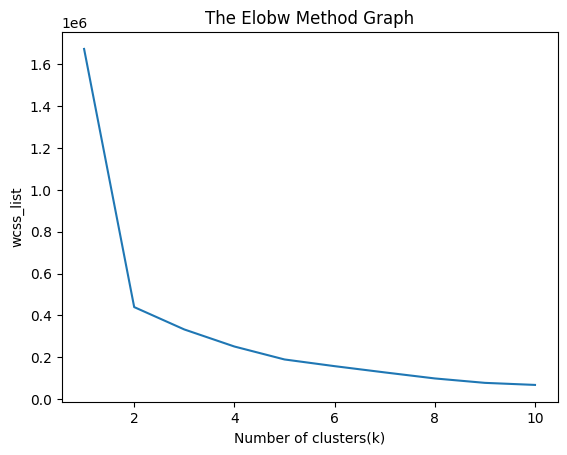

In [45]:
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

### Model creation

In [46]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)  

### Fitting the model

In [47]:
y_predict= kmeans.fit_predict(x) 

### Visualizing the Clusters

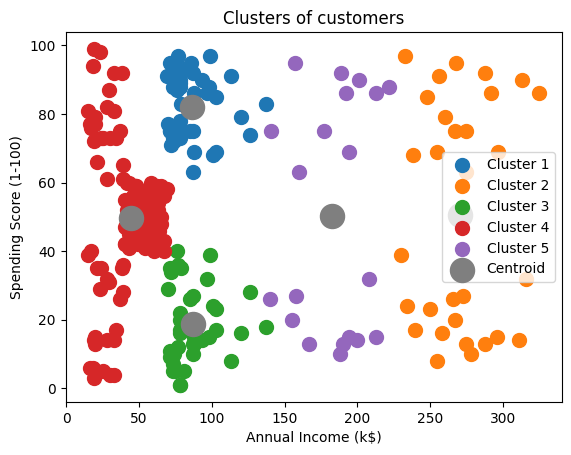

In [48]:
from matplotlib import pyplot as plt

plt.scatter(
    x[y_predict == 0, 0], x[y_predict == 0, 1], s=100, c='tab:blue', label='Cluster 1'
)
plt.scatter(
    x[y_predict == 1, 0], x[y_predict == 1, 1], s=100, c='tab:orange', label='Cluster 2'
)
plt.scatter(
    x[y_predict == 2, 0], x[y_predict == 2, 1], s=100, c='tab:green', label='Cluster 3'
)
plt.scatter(
    x[y_predict == 3, 0], x[y_predict == 3, 1], s=100, c='tab:red', label='Cluster 4'
)
plt.scatter(
    x[y_predict == 4, 0], x[y_predict == 4, 1], s=100, c='tab:purple', label='Cluster 5'
)
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=300, c='tab:gray', label='Centroid'
)
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
